In [1]:
import nest
import numpy as np
import pandas as pd
import sys
import os

import time
import datetime

from tinydb import TinyDB, Query

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib notebook

<IPython.core.display.Javascript object>


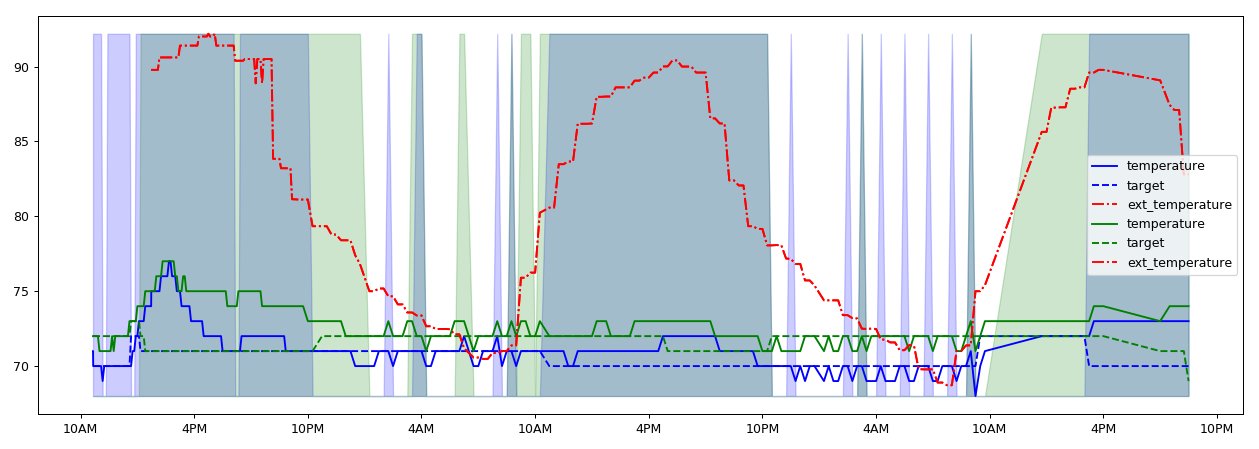

In [5]:
root_dir = os.path.join(os.path.expanduser("~"), 'Documents', 'nest_logger')
db = TinyDB(os.path.join(root_dir, 'db.json'))

df = pd.DataFrame(db.all())
df.last_connection = pd.to_datetime(df.last_connection)
df.request_time = pd.to_datetime(df.request_time)

df['cooling'] = df.hvac_state == 'cooling'


min_temp = min(df.temperature.min(), df.ext_temperature.min(), df.target.min())
max_temp = max(df.temperature.max(), df.ext_temperature.max(), df.target.max())   

plt.figure(figsize=[14,5])

ax = plt.gca()

for name, ls, c in zip(['Upstairs', 'Downstairs'], ['-','-.'], ['b', 'g']):

    pdf = df[df.name == name]
    plt.plot(pdf.request_time, pdf.temperature, '-', c=c)
    plt.plot(pdf.request_time, pdf.target, '--', c=c)
    plt.plot(pdf.request_time, pdf.ext_temperature, '-.', c='r')
    
    times = pdf.request_time.astype(datetime.datetime).as_matrix()
    
    plt.fill_between(times, np.ones(pdf.shape[0])*min_temp, pdf.cooling*(max_temp-min_temp) + min_temp, alpha=0.2, color=c)


    myFmt = mdates.DateFormatter('%-I%p')
    ax.xaxis.set_major_formatter(myFmt)

    plt.legend()
    plt.tight_layout()